In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o CSV (ajuste o caminho se necessário)
df = pd.read_csv("ibge_estados1.csv")

# Visualize as primeiras linhas
print(df.head())


  sigla                         governador  populacao         area    idh  \
0    AC          GLADSON DE LIMA CAMELI        830018   164173.429  0.710   
1    AL  PAULO SURUAGY DO AMARAL DANTAS       3127683    27830.661  0.684   
2    AP      CLÉCIO LUÍS VILHENA VIEIRA        733759   142470.762  0.688   
3    AM             WILSON MIRANDA LIMA       3941613  1559255.881  0.700   
4    BA        JERÔNIMO RODRIGUES SOUZA      14141626   564760.429  0.691   

   renda_per_capita  total_veiculos  matricula_ensino_fundamental  \
0              1095          350273                        147350   
1              1110         1095144                        439014   
2              1520          242574                        131948   
3              1172         1130055                        692623   
4              1139         5120353                       1865574   

   total_desp_bru_empenhadas  total_rec_b_realizada  
0               1.030240e+10           1.113741e+10  
1             

In [3]:
# Seleciona colunas relevantes para análise
colunas_para_cluster = ['populacao', 'area', 'idh', 'renda_per_capita',
                        'total_veiculos', 'matricula_ensino_fundamental',
                        'total_desp_bru_empenhadas', 'total_rec_b_realizada']

dados = df[colunas_para_cluster]

# Normaliza os dados para evitar distorções (muito importante!)
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)


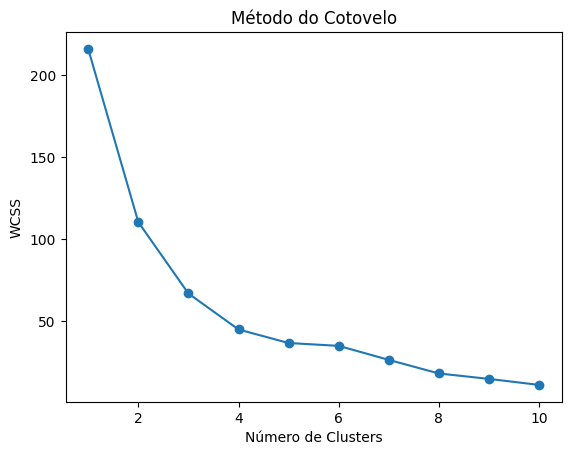

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dados_normalizados)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Digamos que o cotovelo mostrou 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(dados_normalizados)

# Veja os grupos
print(df[['sigla', 'cluster']])


   sigla  cluster
0     AC        2
1     AL        2
2     AP        2
3     AM        2
4     BA        2
5     CE        2
6     DF        0
7     ES        0
8     GO        0
9     MA        2
10    MT        0
11    MS        0
12    MG        0
13    PA        2
14    PB        2
15    PR        0
16    PE        2
17    PI        2
18    RR        2
19    RO        2
20    RJ        0
21    RN        2
22    RS        0
23    SC        0
24    SP        1
25    SE        2
26    TO        2


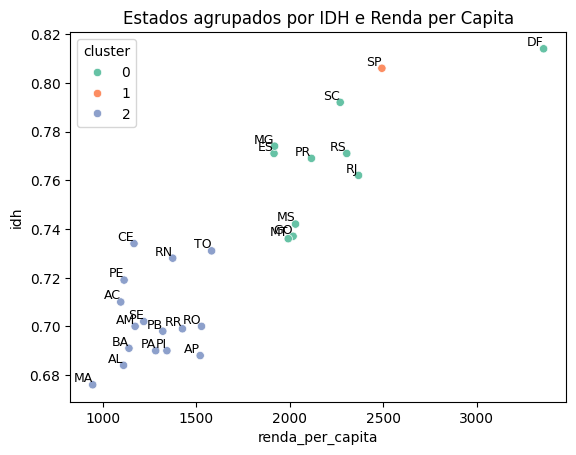

In [8]:
sns.scatterplot(data=df, x='renda_per_capita', y='idh', hue='cluster', palette='Set2')
plt.title('Estados agrupados por IDH e Renda per Capita')

# Colocar as siglas dos estados ao lado dos pontos
for i, row in df.iterrows():
    plt.text(row['renda_per_capita'], row['idh'], row['sigla'], fontsize=9,
             verticalalignment='bottom', horizontalalignment='right')

plt.show()

In [7]:
print(df[['sigla', 'governador', 'cluster']].sort_values('cluster'))


   sigla                              governador  cluster
6     DF          IBANEIS ROCHA BARROS JÚNIOR           0
7     ES               JOSÉ RENATO CASAGRANDE           0
10    MT                MAURO MENDES FERREIRA           0
15    PR          CARLOS ROBERTO MASSA JUNIOR           0
12    MG                      ROMEU ZEMA NETO           0
11    MS                EDUARDO CORREA RIEDEL           0
8     GO                 RONALDO RAMOS CAIADO           0
22    RS  EDUARDO FIGUEIREDO CAVALHEIRO LEITE           0
23    SC            JORGINHO DOS SANTOS MELLO           0
20    RJ     CLÁUDIO BOMFIM DE CASTRO E SILVA           0
24    SP            TARCISIO GOMES DE FREITAS           1
3     AM                  WILSON MIRANDA LIMA           2
4     BA             JERÔNIMO RODRIGUES SOUZA           2
5     CE           ELMANO DE FREITAS DA COSTA           2
2     AP           CLÉCIO LUÍS VILHENA VIEIRA           2
0     AC               GLADSON DE LIMA CAMELI           2
14    PB      